### Ecommerce Text Classification

***

This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the e-commerce website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'ecommerceDataset.csv'

In [2]:
#There is no column names in the dataset, so when we call the data set the first row will get into the column name
#To avoid that, we set the 'header' parameter into 'None'
df = pd.read_csv('ecommerceDataset.csv', header = None)

In [3]:
#TO shuffle the dataset
df = df.sample(frac = 1)

In [4]:
df.reset_index(drop = True, inplace = True)

In [5]:
df = df[0:1000]

In [6]:
df.head()

,0,1
0,Electronics,Pcs System -K7ts Total Security 1-User Activat...
1,Household,Hungry Foal Chocochip Muffin - (Box of 10 Muff...
2,Books,A Set of Three Charts (Opposite+Height+Table) ...
3,Electronics,Spe Tulip 58Mm Flower Lens Hood (Black) For Ca...
4,Household,"Borosil Salad Cutter,Black You demand the best..."


### Check info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### Check for missing values

In [8]:
df.isna().sum()

0    0
1    0
dtype: int64

### Drop missing rows

In [9]:
df.dropna(inplace = True)

### Print some of the text along with its Label

In [10]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Electronics -- Pcs System -K7ts Total Security 1-User Activation Serial key (Multicolour) Get your device with k7's enhanced scan engine in antivirus, a simple and basic protection that every computer needs. Its intelligent real time scanner scans for vulnerabilities. K7 will serve as the backbone of your device's defense system. This is security simplified at your disposal.

Household -- Hungry Foal Chocochip Muffin - (Box of 10 Muffins) Made with a blend of wheat flour and oats flour, our muffins suit the taste buds of all age groups. Draped with chocolate enjoy our decadent Chocochip Muffins, which are fortified, bountiful and all time nutritious snack. Chocochip Muffins are a good source of micronutrients & offers a good combination of Protein Profile viz Whey Protein, Wheat Protein, Oats Protein, Milk Protein, Soya Protein

Books -- A Set of Three Charts (Opposite+Height+Table) (Charts) Beautifully designed and printed in four colours on a very thick paper with a lamination on the

### Create a function to preprocess the text

In [11]:
def preprocess(sentence):
    sentence = sentence.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

In [12]:
df[1] = df[1].apply(preprocess)

### Print some of the texts after the applying the function

In [13]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Electronics -- pc system k7ts total security 1 user activation serial key multicolour get your device with k7 s enhanced scan engine in antivirus a simple and basic protection that every computer need it intelligent real time scanner scan for vulnerability k7 will serve a the backbone of your device s defense system this is security simplified at your disposal

Household -- hungry foal chocochip muffin box of 10 muffin made with a blend of wheat flour and oat flour our muffin suit the taste bud of all age group draped with chocolate enjoy our decadent chocochip muffin which are fortified bountiful and all time nutritious snack chocochip muffin are a good source of micronutrient offer a good combination of protein profile viz whey protein wheat protein oat protein milk protein soya protein

Books -- a set of three chart opposite height table chart beautifully designed and printed in four colour on a very thick paper with a lamination on the front side so that the chart can last long you

### Check for imbalance in the dataset

<Axes: ylabel='count'>

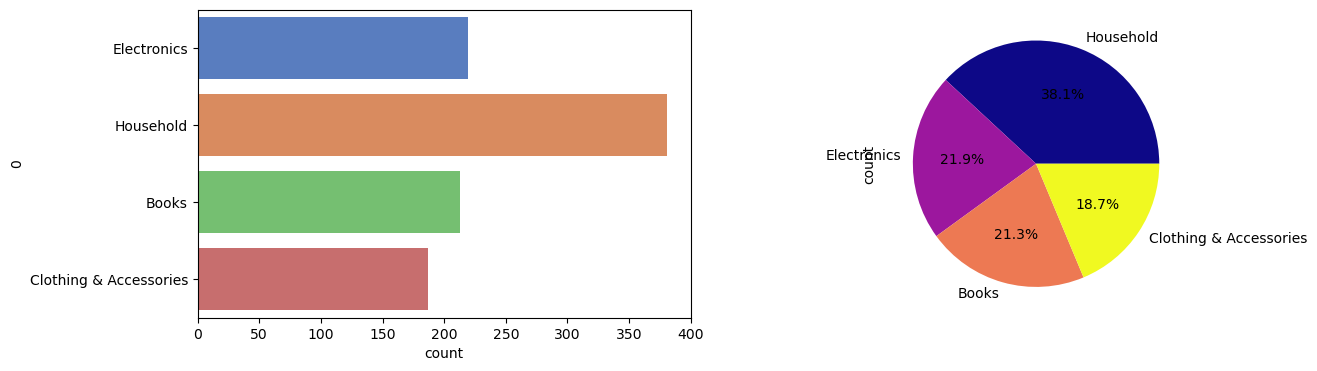

In [16]:
plt.figure(figsize= (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df[0], palette='muted', hue=df[0])
plt.subplot(1,2,2)
df[0].value_counts().plot.pie(autopct = '%1.1f%%', cmap = 'plasma')

### Split the dataset into Input & Target Variables

In [17]:
X = df[1]

In [18]:
y = df[0]

### Label Encode our Target Variables

In [19]:
y = y.map({'Household':0,'Books':1, 'Clothing & Accessories':2, 'Electronics':3})

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [20]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1

def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen = 128)
    
    return padded_sequence

X = text_encoding(X)

### Split the dataset into Training & Testing set

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Create keras Sequential model with Bidirectional LSTM layers

In [22]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation = 'sigmoid'))

### Compile the model

In [23]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [24]:
model.fit(X_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.3548 - loss: 1.3406 - val_accuracy: 0.4500 - val_loss: 1.2623
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.5247 - loss: 1.0732 - val_accuracy: 0.5000 - val_loss: 1.1759
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.6787 - loss: 0.7440 - val_accuracy: 0.6250 - val_loss: 0.7924
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.7945 - loss: 0.5111 - val_accuracy: 0.9500 - val_loss: 0.3562
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.9555 - loss: 0.1875 - val_accuracy: 0.8500 - val_loss: 0.4307
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.9616 - loss: 0.1066 - val_accuracy: 0.8000 - val_loss: 0.5125
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.9750 - loss: 0.0979 - val_accuracy: 0.8500 - val_loss: 0.4277
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.9938 - loss: 0.0281 - val_accuracy: 0

### Make predictions with X_test

In [25]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step


### Fetch the index of the higher probable prediction

In [26]:
y_pred = [np.argmax(i) for i in y_pred]

### Evaluate the model

### Accuracy score

In [27]:
accuracy_score(y_test,y_pred)

0.805

### Confusion matrix

<Axes: >

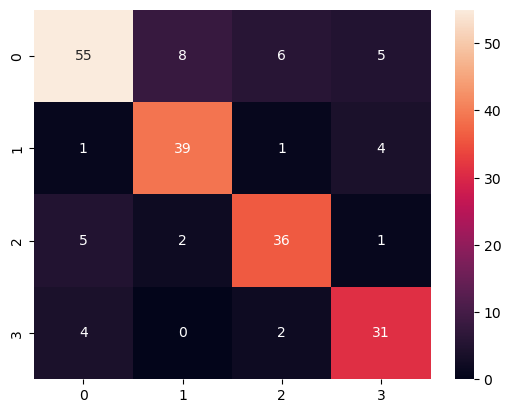

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Classification Report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        74
           1       0.80      0.87      0.83        45
           2       0.80      0.82      0.81        44
           3       0.76      0.84      0.79        37

    accuracy                           0.81       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.81      0.81      0.80       200



***